In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

Import data

In [3]:
# df = pd.read_csv(location)
df = sns.load_dataset('iris')

# EDA
1. Dataset overview
    - shape
    - info
    - missing values
    - duplicated values
    - head, tail, sample

2. Univariate analysis - Numeric Features
    - Distribution plots (hist and box)
    - Describe
    - Outliers 

3. Univariate analysis - Categorical Features
    - Most common values with percentages
    - Countplot with labels
    - Unique values 

4. Bivariate/Multivariate analysis
    - Numeric-numeric : Correlation matrix, scatterplots (for high correlation), pairplots for smaller features
    - Categorical-categorical : 
    - Numerical-categorical: Boxplot/violin plots

5. Data quality checks
    - Missing values
    - Duplicated values
    - Inconsistencies
    - Feature engineering recommendations


# 1. Dataset Overview

In [4]:
print(f"Rows of data: {df.shape[0]}")
print(f"Columns of data: {df.shape[1]}")

Rows of data: 150
Columns of data: 5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [37]:
# Null Values
print("Null Values:")
df.isnull().sum().reset_index()

Null Values:


,index,0
0,sepal_length,0
1,sepal_width,0
2,petal_length,0
3,petal_width,0
4,species,0


In [33]:
print(f"Duplicated values : {df.duplicated(keep=False).sum()}")
if df.duplicated().sum()>0:
    display(df[df.duplicated(keep=False)].reset_index())

Duplicated values : 2


,index,sepal_length,sepal_width,petal_length,petal_width,species
0,101,5.8,2.7,5.1,1.9,virginica
1,142,5.8,2.7,5.1,1.9,virginica


In [34]:
# Display Data
print("Head")
display(df.head(3))
print("Tail")
display(df.tail(3))
print("Sample")
display(df.sample(3))

Head


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


Tail


,sepal_length,sepal_width,petal_length,petal_width,species
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


Sample


,sepal_length,sepal_width,petal_length,petal_width,species
48,5.3,3.7,1.5,0.2,setosa
49,5.0,3.3,1.4,0.2,setosa
104,6.5,3.0,5.8,2.2,virginica


In [35]:
# Column Names
print("Column Names:")
for col in df.columns:
    print(col)

Column Names:
sepal_length
sepal_width
petal_length
petal_width
species


In [ ]:
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns

print(f"Numerical Columns: {len(num_cols)}")
for col in num_cols:
    print(col)

print(f"\nCategorical Columns: {len(cat_cols)}")
for col in cat_cols:
    print(col)



Numerical Columns:4
sepal_length
sepal_width
petal_length
petal_width

Categorical Columns: 1
species


# Observations
1. 
2. 

# 2. Univariate Analysis - Numerical

In [13]:
def numeric_analysis(df,col):

    fig,axs = plt.subplots(1,2,figsize=(10,3))
    axs[0].set_title(f"{col} histplot")
    sns.histplot(df,x=col,ax=axs[0],kde=True)
    axs[1].set_title(f"{col} boxplot")
    sns.boxplot(df,x=col,ax=axs[1])
    plt.tight_layout()
    plt.show()

    print("Describe:")
    display(df[col].describe().reset_index())
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    outliers = df[(df[col] < (Q1 - 1.5*IQR)) | (df[col] > (Q3 + 1.5*IQR))]
    if len(outliers) > 0:
        print("Outliers:")
        display(outliers)
    else:
        print("No outliers")


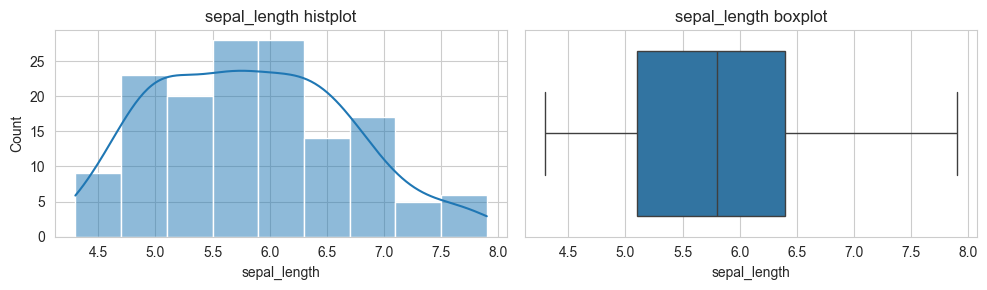

Describe:


,index,sepal_length
0,count,150.000000
1,mean,5.843333
2,std,0.828066
3,min,4.300000
4,25%,5.100000
5,50%,5.800000
6,75%,6.400000
7,max,7.900000


No outliers


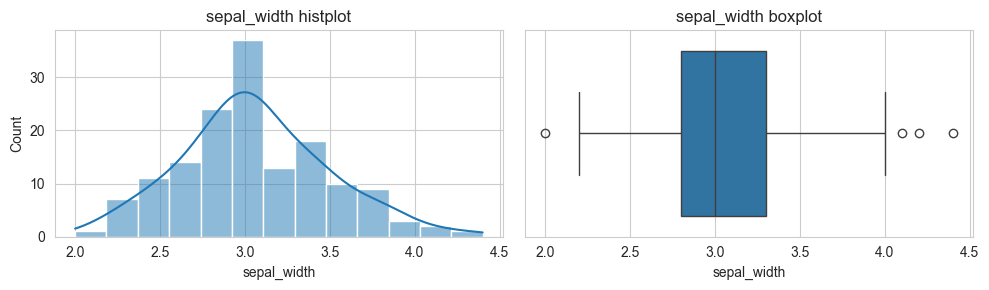

Describe:


,index,sepal_width
0,count,150.000000
1,mean,3.057333
2,std,0.435866
3,min,2.000000
4,25%,2.800000
5,50%,3.000000
6,75%,3.300000
7,max,4.400000


Outliers:


,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,4.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa
60,5.0,2.0,3.5,1.0,versicolor


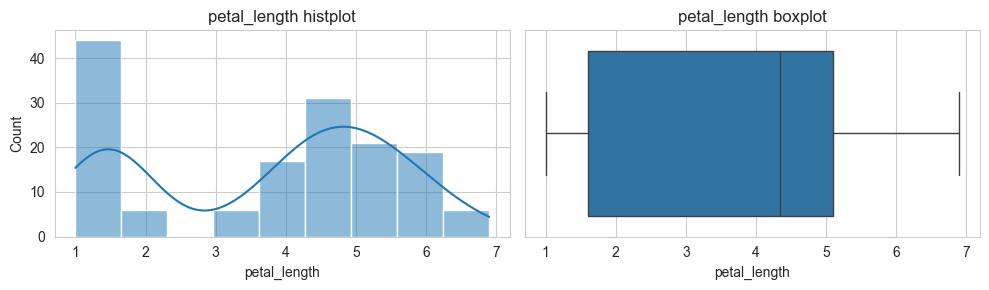

Describe:


,index,petal_length
0,count,150.000000
1,mean,3.758000
2,std,1.765298
3,min,1.000000
4,25%,1.600000
5,50%,4.350000
6,75%,5.100000
7,max,6.900000


No outliers


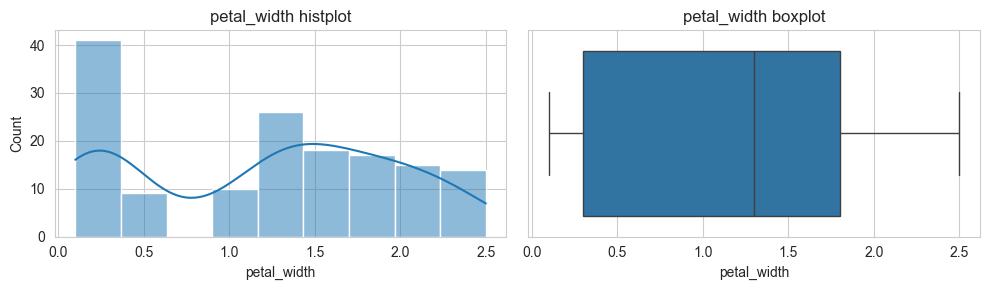

Describe:


,index,petal_width
0,count,150.000000
1,mean,1.199333
2,std,0.762238
3,min,0.100000
4,25%,0.300000
5,50%,1.300000
6,75%,1.800000
7,max,2.500000


No outliers


In [14]:
for col in num_cols:
    numeric_analysis(df,col)

# Observations
1.
2. 

# 3. Univariate Analysis - Categorical Analysis

In [15]:
def categorical_analysis(df,col):
    # Count Plot with labels
    fig,axs = plt.subplots(1,2,figsize=(15,5))
    axs[0].set_title(f"{col} count plot")
    plot = sns.countplot(df,x=col,ax=axs[0], hue=col, palette='cool')
    # Add count/percentage labels to each bar
    total = len(df[col].dropna())
    for container in plot.containers:
        for bar in container:
            height = bar.get_height()
            count = int(height)
            percentage = f'{100 * height/total:.1f}%'
            plot.annotate(f'{count}\n({percentage})',
                          xy=(bar.get_x() + bar.get_width()/2, height),
                          xytext=(0, 3),  # 3 points vertical offset
                          textcoords="offset points",
                          ha='center', va='bottom',
                          fontsize=9)

    # Value Counts into pie chart
    value_counts = df[col].value_counts()
    axs[1].pie(value_counts, labels=value_counts.index, autopct='%.1f%%', startangle=90, colors=sns.color_palette('cool', len(value_counts)))
    axs[1].set_title('Percentage Distribution')

    plt.tight_layout()
    plt.show()

    print(f"Unique counts: {df[col].nunique()}")

In [16]:
cat_cols = ['species']

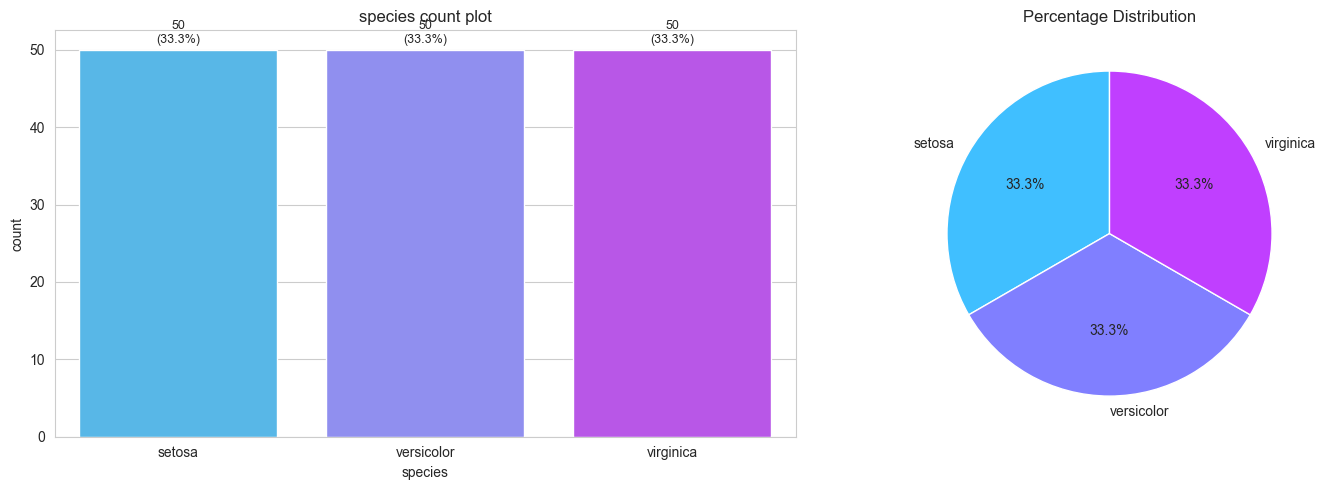

Unique counts: 3


In [17]:
for col in cat_cols:
    categorical_analysis(df,col)

# 4a. Multivariate Analysis - Numeric

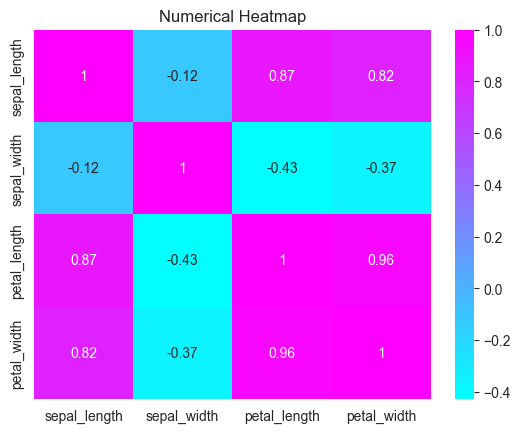

In [18]:
fig = plt.Figure(figsize=(10,10))
plt.title("Numerical Heatmap")
sns.heatmap(df[num_cols].corr(),annot=True,cmap='cool')
plt.show()

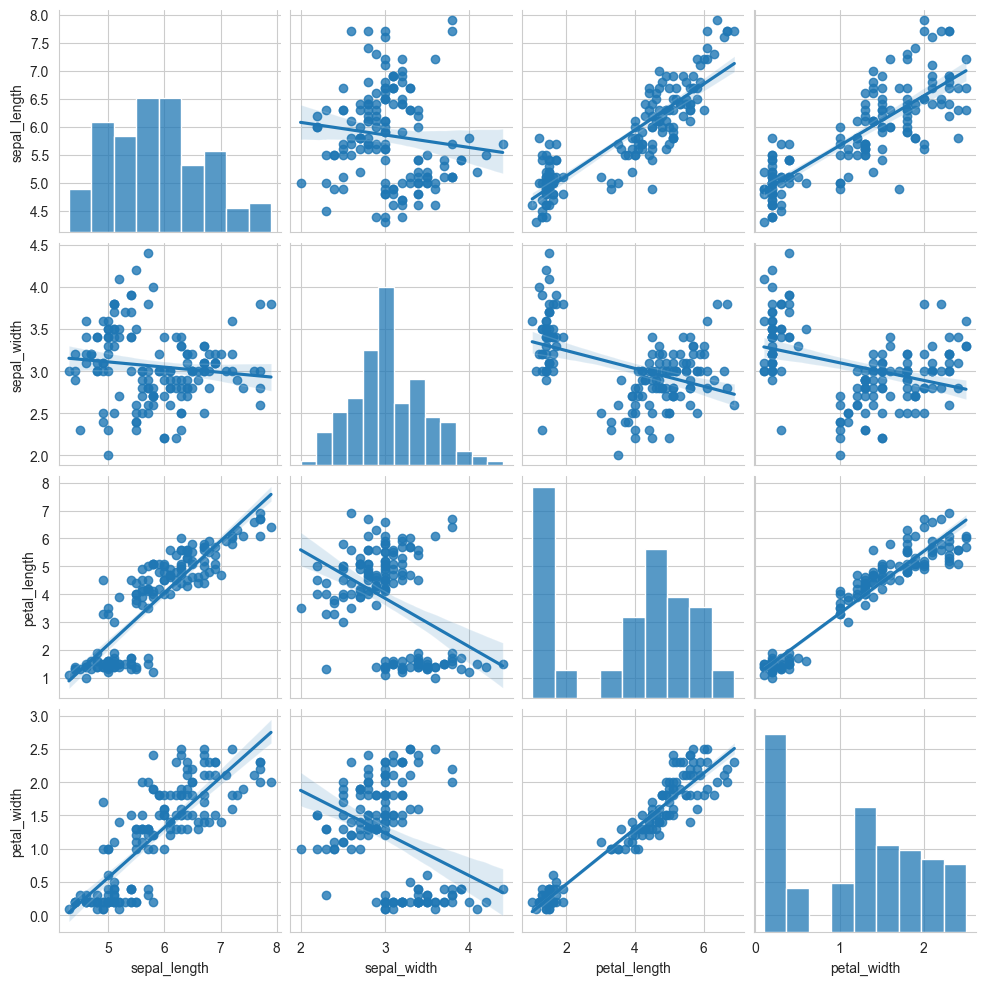

In [19]:
sns.pairplot(df, kind='reg')
plt.show()

# Observations
1. 
2.

# 4b. Multivariate Analysis : Categorical Columns

1. Chi Squared Test
- The null hypothesis H0 is that there is no relationship between two categorical values --> This forms the expected value 
- The alternate hypothesis H1 is that there is a relationship between two categorical values
- The formula measures the squared difference between the expected value and the observed value
- The p value is then used to determine the test results
- p<=0.05 --> null hypothesis are rejected
- p>0.05 --> null hypothesis interpretations are accepted

In [20]:
from scipy.stats import chi2_contingency

In [21]:
def chi_square_test(df,cat_cols):
    results = {}
    for i,col in enumerate(cat_cols):
        for col1 in cat_cols[i+1:]:
            contingency_table = pd.crosstab(df[col],df[col1])
            chi2, p_value, dof, expected = chi2_contingency(contingency_table)
            results[(col,col1)] = {'chi2': chi2, 'p_value' : p_value, 'dof' : dof}
    return pd.DataFrame.from_dict(results,orient='index')

chi_results = chi_square_test(df,cat_cols)
    


# 4c. Multivariate Analysis : Categorical - Numerical

<Axes: >

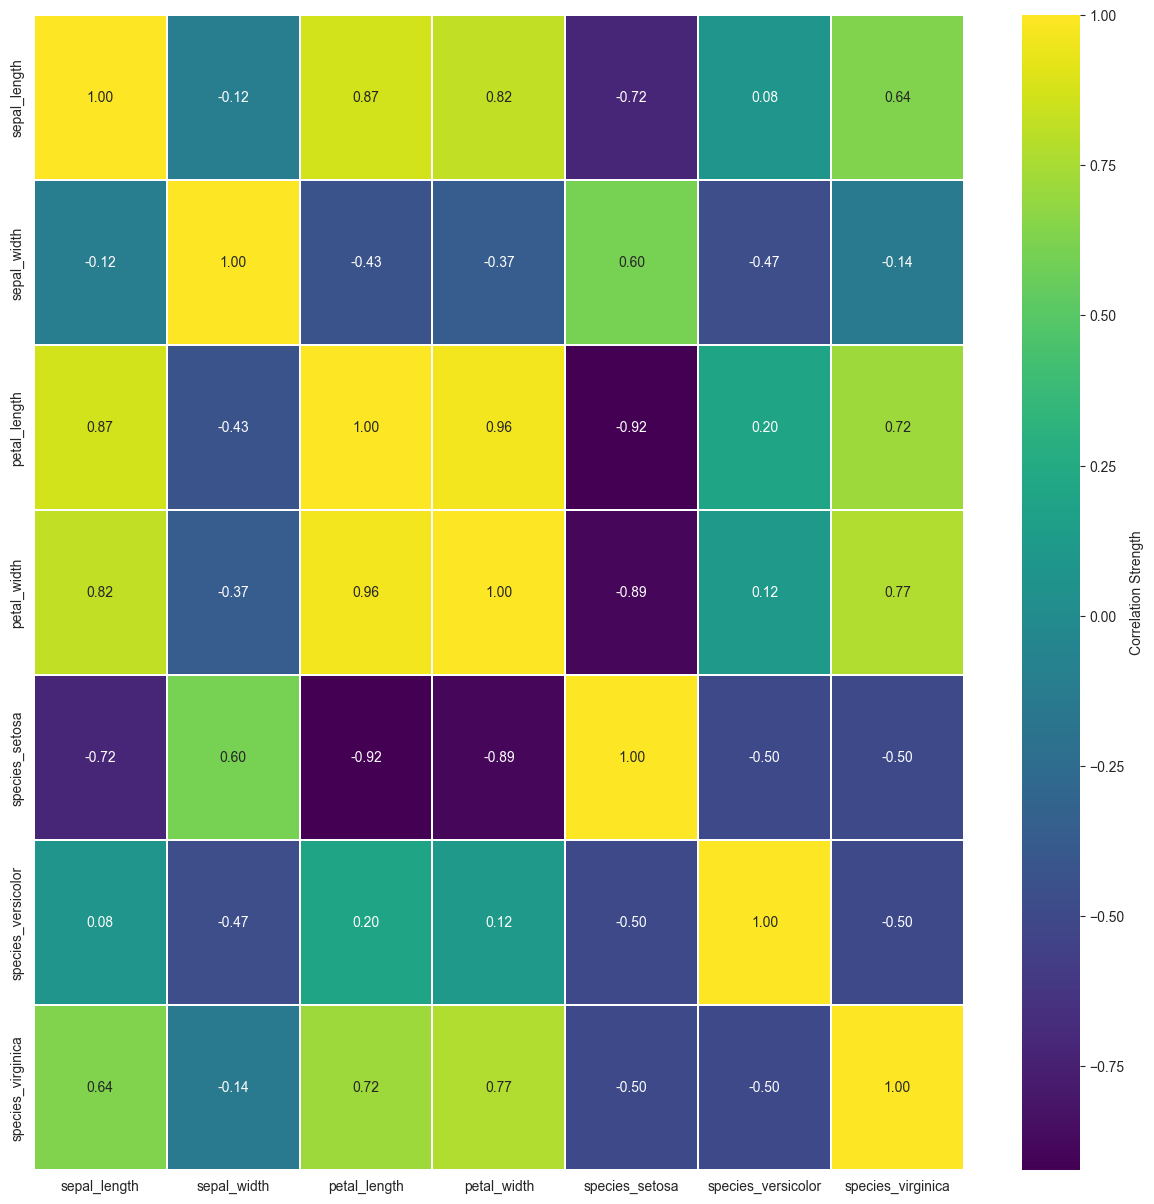

In [22]:
encoded_df = pd.get_dummies(df,drop_first =False)
df_corr = encoded_df.corr()

plt.figure(figsize=(15,15))
sns.heatmap(df_corr, cmap='viridis', fmt='.2f', annot=True,linewidths=0.3,cbar=True, cbar_kws={'label': 'Correlation Strength'}
)

# Observations

# 5. Data Quality Checks

In [23]:
import missingno as msno

<Axes: >

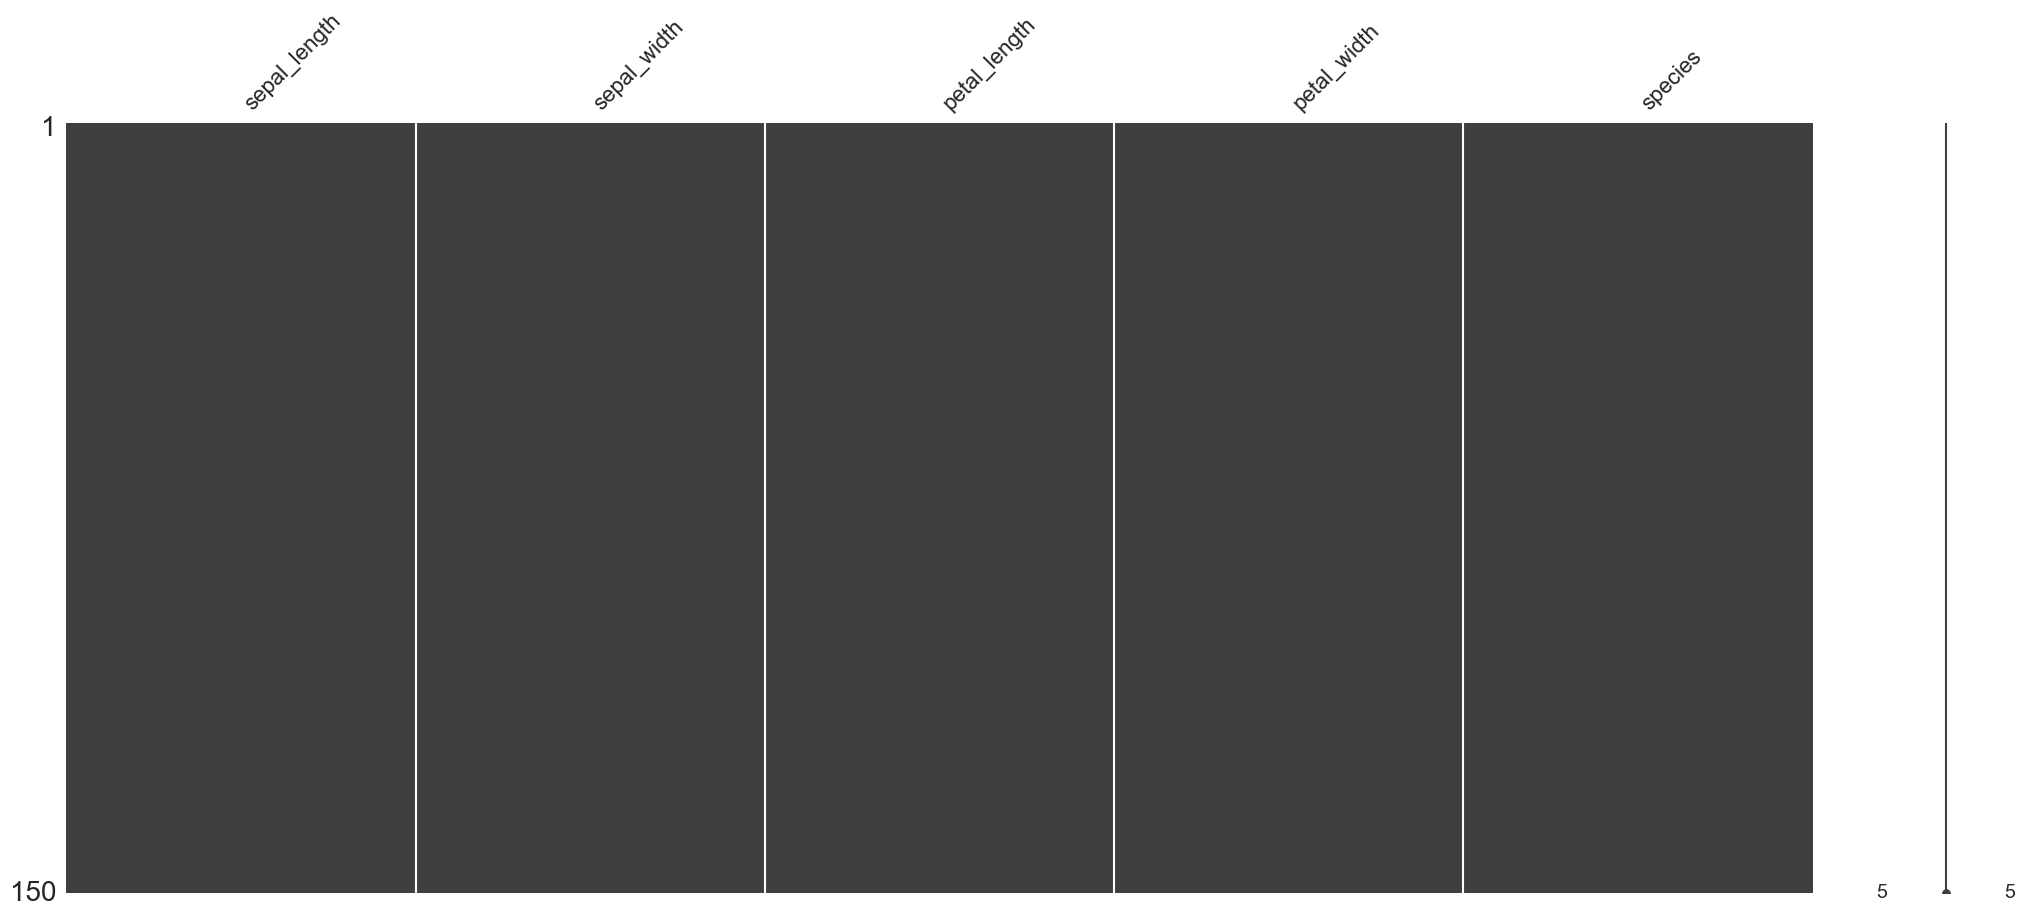

In [24]:
msno.matrix(df)

<Axes: >

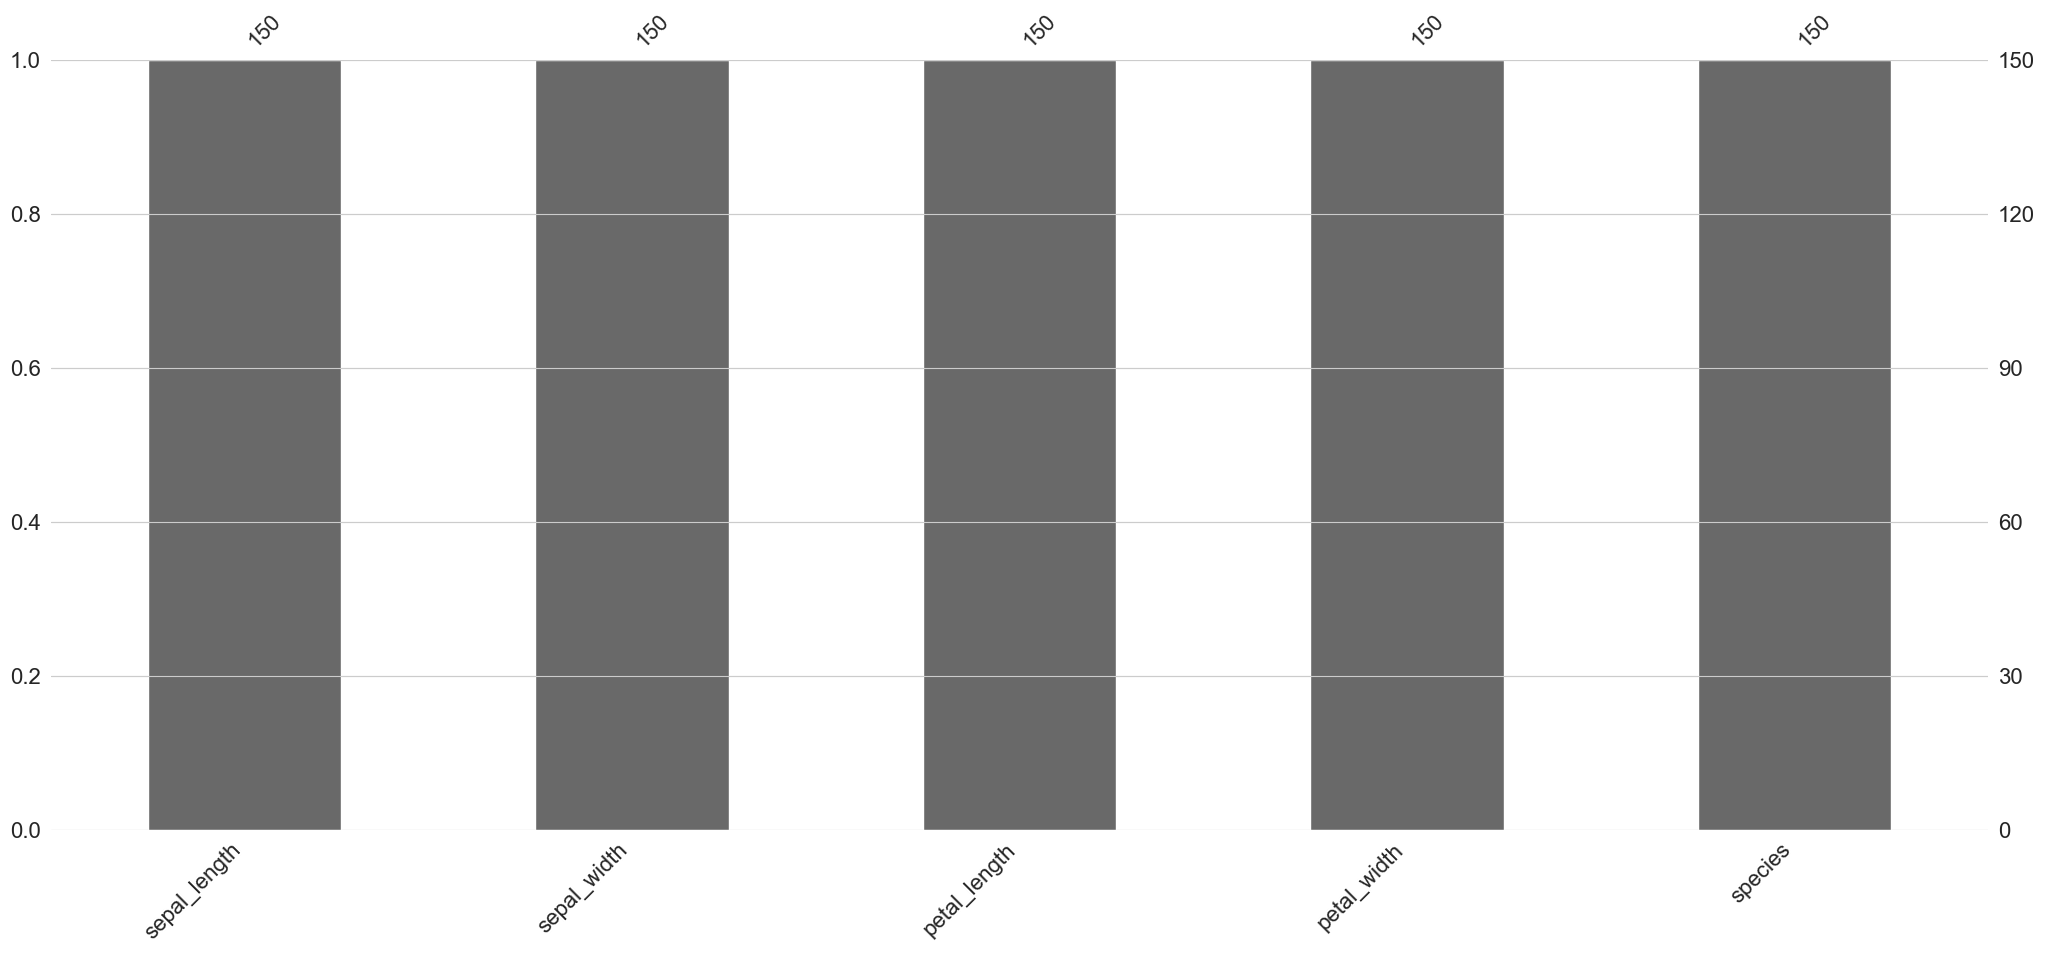

In [25]:
msno.bar(df)

In [26]:
df.duplicated().sum()

1

# Observations
1.
2.

# Feature Engineering recommendations
1.
2.
3.